### **Question E | Multiresolution Correlation, Hurst Exponent and Annualized Volatility**

> 1. With Haar wavelets and the dataset provided with TD5, determine the multiresolution correlation
between all the pairs of FX rates, using GBPEUR, SEKEUR, and CADEUR (work with the average between
the highest and the lowest price and transform this average price in returns on the smallest time step).
Do you observe an Epps effect and how could you explain this?

In [205]:
# Open original data file
import pandas as pd
raw_data = pd.read_excel("Dataset TD5.xlsx", header=None)
raw_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GBPEUR Curncy,NaN,NaN,NaN,SEKEUR Curncy,NaN,NaN,NaN,CADEUR Curncy,NaN,NaN
2,Date,HIGH,LOW,NaN,Date,HIGH,LOW,NaN,Date,HIGH,LOW


In [206]:
# We fix the data format by handpicking columns to make the dataframe we want
df = pd.DataFrame()

# For pound - euro
df["high_GBPEUR"] = raw_data.iloc[3:, 1] # 2nd column starting from 4th row
df["low_GBPEUR"]  = raw_data.iloc[3:, 2] # 3rd column starting from 4th row

# For sweden crown - euro
df["high_SEKEUR"] = raw_data.iloc[3:, 5] # 6th column starting from 4th row
df["low_SEKEUR"]  = raw_data.iloc[3:, 6] # 7th column starting from 4th row

# For canada dollar - euro
df["high_CADEUR"] = raw_data.iloc[3:, 9] # 10th column starting from 4th row
df["low_CADEUR"]  = raw_data.iloc[3:, 10] # 11th column starting from 4th row

# Then we add the date 
df["date"] = raw_data.iloc[3:, 0] # 1st column starting from 4th row
# Fixed data
df

,high_GBPEUR,low_GBPEUR,high_SEKEUR,low_SEKEUR,high_CADEUR,low_CADEUR,date
3,1.2932,1.2917,0.10725,0.1072,0.6842,0.6829,2016-03-07 08:59:59.990000
4,1.294,1.293,0.10728,0.10717,0.6849,0.6841,2016-03-07 09:15:00
5,1.2943,1.2922,0.10726,0.10719,0.6844,0.6837,2016-03-07 09:30:00
6,1.293,1.2913,0.10728,0.10721,0.6844,0.6839,2016-03-07 09:45:00
7,1.2931,1.2921,0.10725,0.10719,0.684,0.6835,2016-03-07 10:00:00
...,...,...,...,...,...,...,...
12927,1.1879,1.1867,0.10536,0.10531,0.6897,0.6893,2016-09-07 17:00:00
12928,1.1883,1.1874,0.10537,0.10534,0.6902,0.6895,2016-09-07 17:15:00
12929,1.188,1.1874,0.10538,0.10536,0.6902,0.6898,2016-09-07 17:30:00
12930,1.1874,1.1866,0.10537,0.10536,0.6902,0.6901,2016-09-07 17:45:00


In [207]:
# First we compute the average between the lowest and the highest price
# We do the operation for each fx rate
df['mid_GBPEUR'] = (df['high_GBPEUR']+df['low_GBPEUR'])/2
df['returns_GBPEUR']=df['mid_GBPEUR'].pct_change()
df['mid_SEKEUR'] = (df['high_SEKEUR']+df['low_SEKEUR'])/2
df['returns_SEKEUR']=df['mid_SEKEUR'].pct_change()
df['mid_CADEUR'] = (df['high_CADEUR']+df['low_CADEUR'])/2
df['returns_CADEUR']=df['mid_CADEUR'].pct_change()
df = df.drop(3, axis=0) # We remove the line with NaNs
df.head()

C:\Users\Adrien\AppData\Local\Temp\ipykernel_17736\4129758546.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['returns_GBPEUR']=df['mid_GBPEUR'].pct_change()
C:\Users\Adrien\AppData\Local\Temp\ipykernel_17736\4129758546.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['returns_SEKEUR']=df['mid_SEKEUR'].pct_change()
C:\Users\Adrien\AppData\Local\Temp\ipykernel_17736\4129758546.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False)

,high_GBPEUR,low_GBPEUR,high_SEKEUR,low_SEKEUR,high_CADEUR,low_CADEUR,date,mid_GBPEUR,returns_GBPEUR,mid_SEKEUR,returns_SEKEUR,mid_CADEUR,returns_CADEUR
4,1.294,1.293,0.10728,0.10717,0.6849,0.6841,2016-03-07 09:15:00,1.2935,0.000812,0.107225,0.000000e+00,0.6845,1.389803e-03
5,1.2943,1.2922,0.10726,0.10719,0.6844,0.6837,2016-03-07 09:30:00,1.29325,-0.000193,0.107225,-1.110223e-16,0.68405,-6.574142e-04
6,1.293,1.2913,0.10728,0.10721,0.6844,0.6839,2016-03-07 09:45:00,1.29215,-0.000851,0.107245,1.865237e-04,0.68415,1.461881e-04
7,1.2931,1.2921,0.10725,0.10719,0.684,0.6835,2016-03-07 10:00:00,1.2926,0.000348,0.10722,-2.331111e-04,0.68375,-5.846671e-04
8,1.2926,1.2921,0.10724,0.10718,0.6839,0.6836,2016-03-07 10:15:00,1.29235,-0.000193,0.10721,-9.326618e-05,0.68375,-1.110223e-16


Now that the data is formatted in a practical way, we can calculate the Haar wavelet transforms to then analyze multiresolution correlations between all the FX rates.

Haar wavelets are useful to approximate functions, and they follow the expression:
$$\psi(t) =
\begin{cases}
-1, & 0 \le t < \tfrac{1}{2}, \\
\;\;1, & \tfrac{1}{2} \le t < 1, \\
0, & \text{otherwise}.
\end{cases}$$

The bigger the step, the more we approximate the true shape of the function, it's like a blurry filter.

Originally, we thought the method to execute a Haar wavelet transformation used a sort of rolling window (overlap), but according to the Wikipedia page on wavelet transforms, the classic method for calculating specifically the *Haar* wavelets does not use overlap (https://en.wikipedia.org/wiki/Discrete_wavelet_transform), so we won't use overlap and will "lose" half the data at each time frame increment.

In [208]:
import numpy as np
# Function for transforming the return arrays in wavelets for different time steps (15', 30', 60' etc) 
def haar_transformation(data):
    # put the returns data into a numpy array
    a = data.values
    coef = []
    
    # We loop as long as possible, so until the size of the scale is half the dataset
    while len(a) >= 2:
        # If odd length, drop the last one to ensure pairing
        if len(a) % 2 != 0:
            a = a[:-1]
            
        # We take steps of 2 every time, allowing us to calculate all differences and approximations at once
        # even = a[0], a[2], a[4], etc
        # odd  = a[1], a[3], a[5], etc
        # Here we got two arrays containing the [0, 1/2[ and [1/2, 1[ of each step
        even = a[0::2]
        odd  = a[1::2]
        
        # First we start by storing the difference
        d = (even - odd) / np.sqrt(2)
        coef.append(d)
        
        # Second, we pass the sum array to the next level
        # This becomes the input 'a' for the next iteration
        next_a = (even + odd) / np.sqrt(2)
        a = next_a
        
    # To finish we also store the last remaining sum, which represents the overall trend of the series
    coef.append(a) 
    # we have coef the list of all the haar transformations arrays of the original series, with indices j the different time scales
    return coef

Now we want to implement a function to calculate covariances between the FX rates at different time scales. 

The lesson states the covariance of the scale coefficients for a given scale $j$ is:

$$\mathrm{Cov}(j)
=
\frac{1}{T}
\sum_{k=1}^{T}
\left(
c_{j,k}^{1}
- \frac{1}{T}\sum_{l=1}^{T} c_{j,l}^{1}
\right)
\left(
c_{j,k}^{2}
- \frac{1}{T}\sum_{l=1}^{T} c_{j,l}^{2}
\right)$$

In [209]:
# function to calculate the covariance between two Haar transformed series for each time scale j
def covariance(coef1, coef2):
    # even out number of steps
    min_levels = min(len(coef1), len(coef2))
    covariances = []    
    # We iterate on each time scale j
    for j in range(min_levels):
        c1_j = coef1[j]
        c2_j = coef2[j]
        
        # Check for size and cut to the smallest size if uneven
        t = min(len(c1_j), len(c2_j))
        c1_j = c1_j[:t]
        c2_j = c2_j[:t]
        # First we calculate the means of c1 and c2
        mean1 = np.mean(c1_j)
        mean2 = np.mean(c2_j)
         # after that we apply the covariance formula
        sum_prod = np.sum((c1_j - mean1) * (c2_j - mean2))
        # and divide everything by T
        cov_value = sum_prod / t
        covariances.append(cov_value)
    # It returns a series with the covariances for all the time scales organized in increasing order of j
    return pd.Series(covariances)

We want to correct the bias in the covariances, and for that we use the correlation, which is just the covariance normalized with the variances:
$$\rho_j = \frac{\text{Cov}_j(X, Y)}{\sigma_{X,j} \cdot \sigma_{Y,j}}$$

In [210]:
def correlation(coef1, coef2):
    
    # at the numerator we calculate the cov between the two series for each j
    cov_12 = covariance(coef1, coef2)
    
    # At the denominator we calculate standard deviations of each series for all j
    # We use cov(X,X) which is the variance itself
    var_1 = covariance(coef1, coef1)
    var_2 = covariance(coef2, coef2)
    
    # The std is sqrt(var)
    sigma_1 = np.sqrt(var_1)
    sigma_2 = np.sqrt(var_2)
    
    # we put together numerator and denominator, and calculate a corr for each j
    correls = cov_12 / (sigma_1 * sigma_2)
    # Organized series of correlations for each time scale j
    return correls

The mathematical framework is defined, now we apply all those functions on our data to answer the question. The goal is to analyze if there is a Epps effect so we will plot the correlations for each j to see if they increase.

In [211]:
# series to store the correlations for each pair of FX rate for all time scales
analys_series = []
# Apply Haar transform on each series
GBPEUR = haar_transformation(df['returns_GBPEUR'])
SEKEUR = haar_transformation(df['returns_SEKEUR'])
CADEUR = haar_transformation(df['returns_CADEUR'])
# Define the pairs we want to analyze
pairs = [("GBPEUR_SEKEUR", GBPEUR, SEKEUR), ("GBPEUR_CADEUR", GBPEUR, CADEUR) ,("SEKEUR_CADEUR", SEKEUR, CADEUR)]
for label, c1, c2 in pairs:
    # we apply correlation
    corr = correlation(c1, c2)
    # We define a name for the pair of FX rate
    corr.name = label
    # We add it to the series
    analys_series.append(corr)

# We merge each multiresolution correlation analysis to obtain a df with all pairs of rates
analys_df = pd.concat(analys_series, axis=1)
analys_df

,GBPEUR_SEKEUR,GBPEUR_CADEUR,SEKEUR_CADEUR
0,0.160125,0.218216,0.174238
1,0.139983,0.327564,0.253711
2,0.299736,0.225954,0.159991
3,0.162016,0.174538,0.081919
4,0.112468,0.309017,0.283231
5,0.476888,0.072732,0.248734
6,0.403747,0.280741,0.138279
7,0.406767,0.142388,0.281743
8,0.502975,0.123592,0.406730
9,0.821336,0.082087,0.240948


Do we observe an Epps effect? According to Wikipedia (https://en.wikipedia.org/wiki/Epps_effect), the Epps effect is the phenomenon that the empirical correlation between the returns of two different stocks decreases with the length of the interval for which the price changes are measured.

Put simply, if the correlation increases with the size of the time steps, we observe an Epps effect.

Let's plot our dataframe to visually analyze the curve:

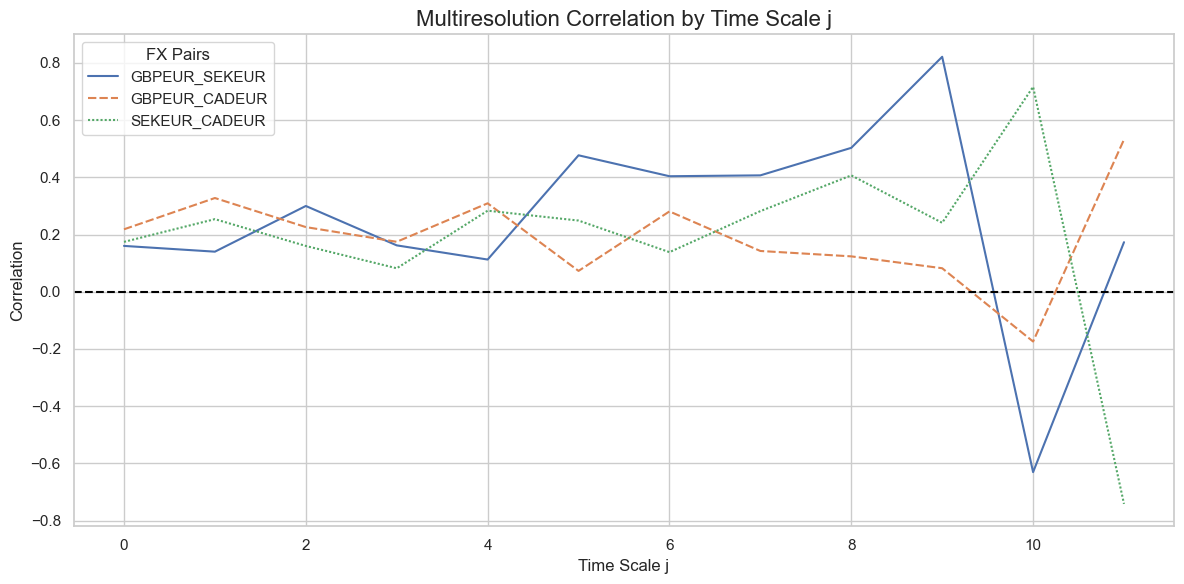

In [212]:
# plotting librairies
import seaborn as sns
import matplotlib.pyplot as plt

def multires_correlation_analys(df):
    # We remove NaNs else it doesn't compile
    df = df.dropna()
    #Looks better with whitegrid
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df)
    plt.title("Multiresolution Correlation by Time Scale j", fontsize=16)
    plt.xlabel("Time Scale j", fontsize=12)
    plt.ylabel("Correlation", fontsize=12)
    #line at 0 for reference
    plt.axhline(0, color='black', linestyle='--')
    plt.legend(title="FX Pairs")
    plt.tight_layout()
    plt.show()

multires_correlation_analys(analys_df)

To conclude, we see the tendency for GBPEUR-SEKEUR and SEKEUR-CADEUR seem to follow an Epps effect, but when the time scale becomes too large, the value of the data deteriorates as a correlation based on very few data points isn't a very good indicator.

For GBPEUR-CADEUR there does not seem to be an Epps effect, the correlation appears relatively stable with each time scale increments.

The Epps effect can be explained by the difference bewteen microstructure noise (on the short time scales like 15' and 30') and macroeconomic relationships between the FX rates. If we use the example of GBPEUR-CADEUR, we can infer that there is not a strong fundamental correlation between the two FX pairs that reveals with increased time steps. Their correlation could be more driven by a constant factor that doesn't depend on the time scale.

> 2. Calculate the Hurst exponent of GBPEUR, SEKEUR, and CADEUR. Determine their annualized
volatility using the daily volatility and Hurst exponents.